# UN Exploration

### Guided Practice:
 1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

display(gdp_df.head(10))
display(gdp_df.tail(10))

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [3]:
gdp_df = (
    gdp_df
    .drop(columns='Value Footnotes')
    .rename(columns={'Country or Area': 'Country',
                    'Value': 'GDP_Per_Capita'})
)

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [4]:
print(f'rows: {gdp_df.shape[0]}\ncolumns: {gdp_df.shape[1]}')
print('===================')
print(gdp_df.info())

rows: 7176
columns: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int64  
 2   GDP_Per_Capita  7176 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 168.3+ KB
None


7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [5]:
gdp_df['Year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

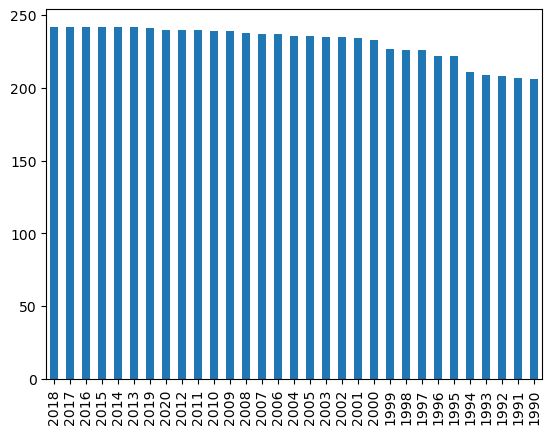

In [6]:
gdp_df['Year'].value_counts().plot(kind='bar');

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [7]:
print('num countries:', gdp_df['Country'].nunique())

num countries: 242


In [8]:
gdp_df['Country'].value_counts().nsmallest()

Somalia                       8
Djibouti                      8
Turks and Caicos Islands     10
Sint Maarten (Dutch part)    10
Kosovo                       13
Name: Country, dtype: int64

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [9]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]

10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [10]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2014.0,19612.875611
std,0.0,20961.714572
min,2014.0,822.611195
25%,2014.0,4702.212961
50%,2014.0,12178.874687
75%,2014.0,26461.384188
max,2014.0,155201.740571


11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

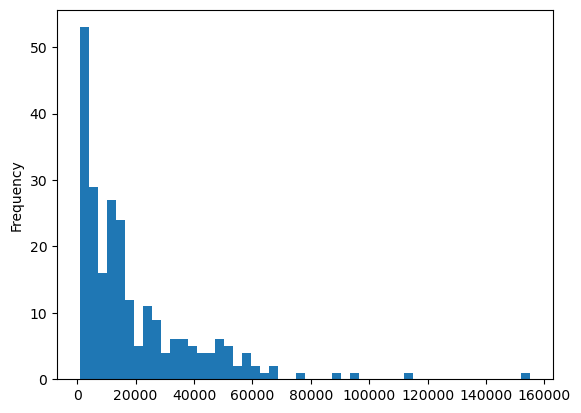

In [11]:
#bimodal, skewed right
gdp_2014['GDP_Per_Capita'].plot(kind='hist', bins=50);

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2018.

In [12]:
gdp_2018 = gdp_df.loc[gdp_df['Year'] == 2018]

print(gdp_2018['GDP_Per_Capita'].nlargest(5))
print(gdp_2018['GDP_Per_Capita'].nsmallest(5))

3915    132373.544079
3884    115049.926079
5722     98336.956494
5383     90970.060902
3073     83726.362961
Name: GDP_Per_Capita, dtype: float64
916      761.524143
1138     933.109951
1526    1085.893688
5873    1129.531464
4752    1200.402348
Name: GDP_Per_Capita, dtype: float64


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2018 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2018. Save the result to a dataframe named `gdp_pivoted`.

In [13]:
gdp_pivoted = (
    gdp_df
        .loc[gdp_df['Year']
        .isin([1990, 2018])]
        .pivot_table(values='GDP_Per_Capita', index='Country', columns='Year')
        .dropna()
        .reset_index()
)

gdp_pivoted

Year,Country,1990,2018
0,Africa Eastern and Southern,3083.976800,3697.317275
1,Africa Western and Central,2810.341129,4132.592996
2,Albania,4827.034551,13317.092313
3,Algeria,8746.340762,11630.679409
4,Angola,5758.950488,6982.129420
...,...,...,...
201,Vanuatu,2855.554643,3093.086718
202,Vietnam,2066.372215,9548.700016
203,World,9704.621768,16679.316815
204,Zambia,2190.181724,3521.545978


In [14]:
# this to get rid of the "Year" which is how the columns are named
gdp_pivoted.columns.name = None

In [15]:
gdp_pivoted

,Country,1990,2018
0,Africa Eastern and Southern,3083.976800,3697.317275
1,Africa Western and Central,2810.341129,4132.592996
2,Albania,4827.034551,13317.092313
3,Algeria,8746.340762,11630.679409
4,Angola,5758.950488,6982.129420
...,...,...,...
201,Vanuatu,2855.554643,3093.086718
202,Vietnam,2066.372215,9548.700016
203,World,9704.621768,16679.316815
204,Zambia,2190.181724,3521.545978


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2018. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.


In [16]:
gdp_pivoted['Percent_Change'] = 100.*(gdp_pivoted[2018] - gdp_pivoted[1990]) / gdp_pivoted[1990]

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2018?

In [17]:
print(len(gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0]))

17


16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [18]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False).head(2)

,Country,1990,2018,Percent_Change
55,Equatorial Guinea,1039.985049,20386.013868,1860.221820
36,China,1423.896348,15133.995618,962.857956


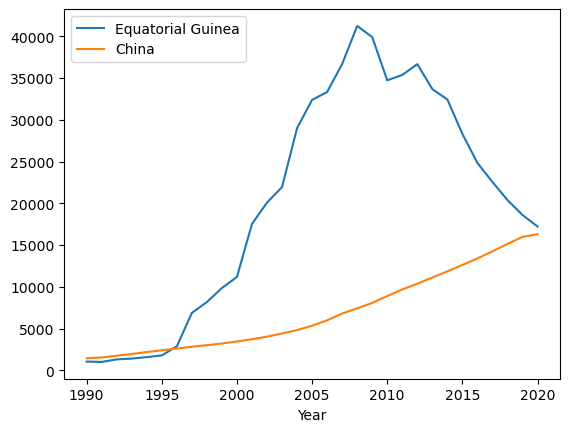

In [19]:
ax = gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea'].plot(kind='line', x='Year', y='GDP_Per_Capita', label='Equatorial Guinea')
gdp_df.loc[gdp_df['Country'] == 'China'].plot(kind='line', x='Year', y='GDP_Per_Capita', label='China', ax=ax);

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.


In [20]:
continents = pd.read_csv('../data/continents.csv')

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.


In [21]:
gdp_df = gdp_df.merge(continents, how='inner')

19. Determine the number of countries per continent. Create a bar chart showing this.

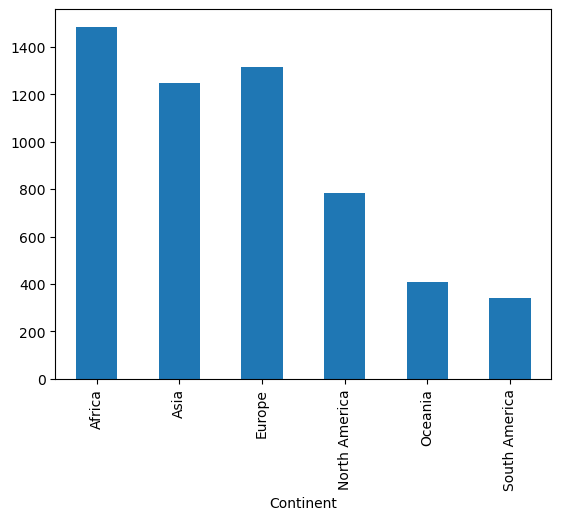

In [22]:
gdp_df.groupby('Continent')['Country'].count().plot(kind='bar');


20. Create a seaborn boxplot showing GDP per capita in 2018 split out by continent. What do you notice?

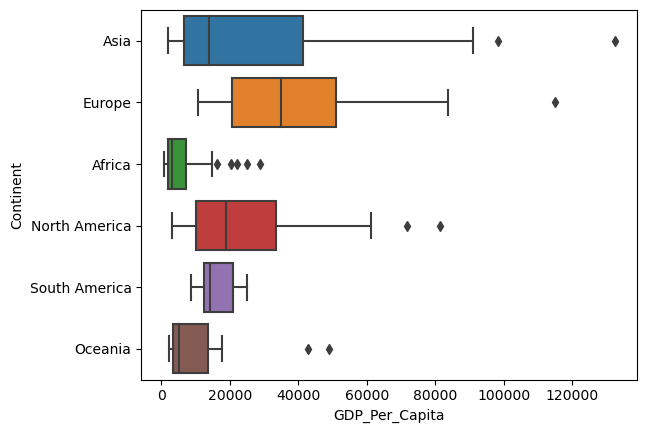

In [23]:
sns.boxplot(data=gdp_df.loc[gdp_df['Year'] == 2018], x='GDP_Per_Capita', y='Continent');

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correc this without modifying the original csv file.

In [24]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv', skiprows=4)

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [25]:
life_expectancy = life_expectancy.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 67'])

In [26]:
life_expectancy = life_expectancy.melt(id_vars='Country Name', var_name='Year', value_name='Life_Expectancy')

23. What was the first country with a life expectancy to exceed 80?

In [27]:
life_expectancy.loc[life_expectancy['Life_Expectancy'] > 80].sort_values(by='Year')

,Country Name,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16304,Faroe Islands,2021,83.497561
16307,United Kingdom,2021,80.700000
16315,Greece,2021,80.182927
16334,Isle of Man,2021,80.525000


24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [28]:
life_expectancy['Year'] = life_expectancy['Year'].astype('int')

In [29]:
gdp_le =(
    gdp_df
    .merge(life_expectancy, how='inner', left_on=['Country', 'Year'], right_on=['Country Name', 'Year'])
    .drop(columns='Country Name')
)

25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

In [30]:
gdp_le_2019 = gdp_le.loc[gdp_le['Year'] == 2019].copy()

In [31]:
len(gdp_le_2019.loc[gdp_le_2019['Life_Expectancy'] >= 80])

34

26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [32]:
top3_gdp = gdp_le_2019.loc[gdp_le_2019['GDP_Per_Capita'].nlargest(3).index, 'Country']

gdp_le_2019.loc[gdp_le_2019['GDP_Per_Capita'].nlargest(3).index]

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2715,"Macao SAR, China",2019,127272.548511,Asia,84.978000
2684,Luxembourg,2019,116518.276815,Europe,82.639024
4140,Singapore,2019,98283.308908,Asia,83.595122


In [33]:
top3_gdp_le = gdp_le.loc[gdp_le['Country'].isin(top3_gdp)]

In [34]:
top3_gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2683,Luxembourg,2020,112557.309472,Europe,82.143902
2684,Luxembourg,2019,116518.276815,Europe,82.639024
2685,Luxembourg,2018,115049.926079,Europe,82.295122
2686,Luxembourg,2017,114985.842236,Europe,82.095122
2687,Luxembourg,2016,116283.699681,Europe,82.685366
...,...,...,...,...,...
4165,Singapore,1994,46819.522993,Asia,76.197561
4166,Singapore,1993,43486.234224,Asia,76.046341
4167,Singapore,1992,40014.826063,Asia,75.946341
4168,Singapore,1991,38667.750581,Asia,75.646341


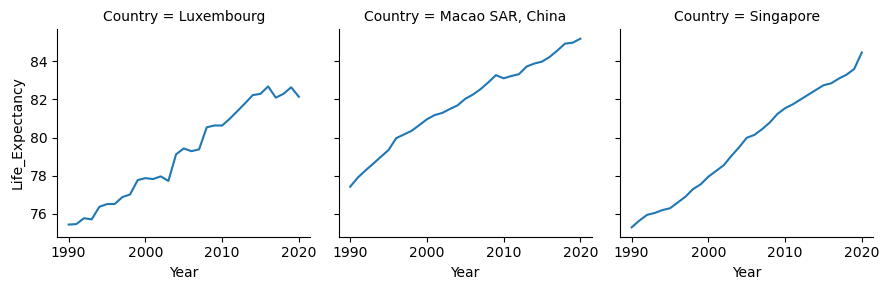

In [35]:
g = sns.FacetGrid(top3_gdp_le, col='Country')
g.map(sns.lineplot, 'Year', 'Life_Expectancy');

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

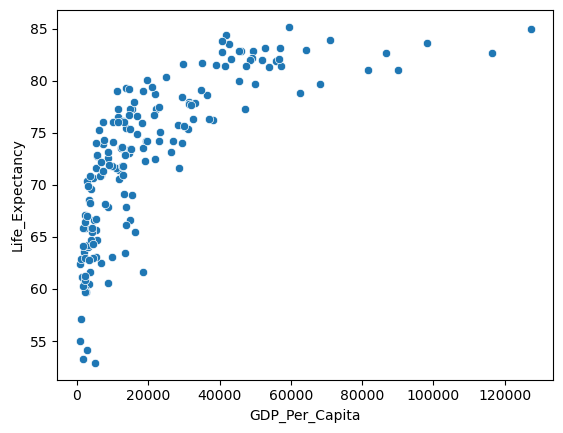

In [36]:
sns.scatterplot(data=gdp_le_2019, x='GDP_Per_Capita', y='Life_Expectancy');


28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

In [37]:
gdp_le_2019[['GDP_Per_Capita', 'Life_Expectancy']].corr()

,GDP_Per_Capita,Life_Expectancy
GDP_Per_Capita,1.000000,0.726147
Life_Expectancy,0.726147,1.000000


29. Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [38]:
gdp_le_2019['log_GDP_Per_Capita'] = np.log(gdp_le_2019['GDP_Per_Capita'])

In [40]:
gdp_le_2019[['log_GDP_Per_Capita', 'Life_Expectancy']].corr()

,log_GDP_Per_Capita,Life_Expectancy
log_GDP_Per_Capita,1.000000,0.862735
Life_Expectancy,0.862735,1.000000


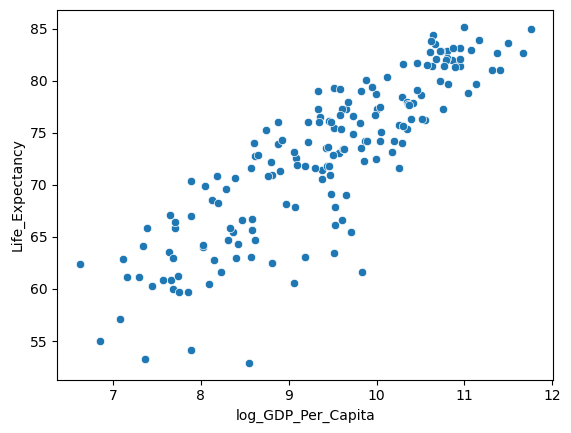

In [41]:
sns.scatterplot(data=gdp_le_2019, x='log_GDP_Per_Capita', y='Life_Expectancy');


### Solo Exploration and Presentation:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations or trends that you find. 
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).
